# Statistical Bias

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss #for some probability functionality

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14,10

# Location and scale

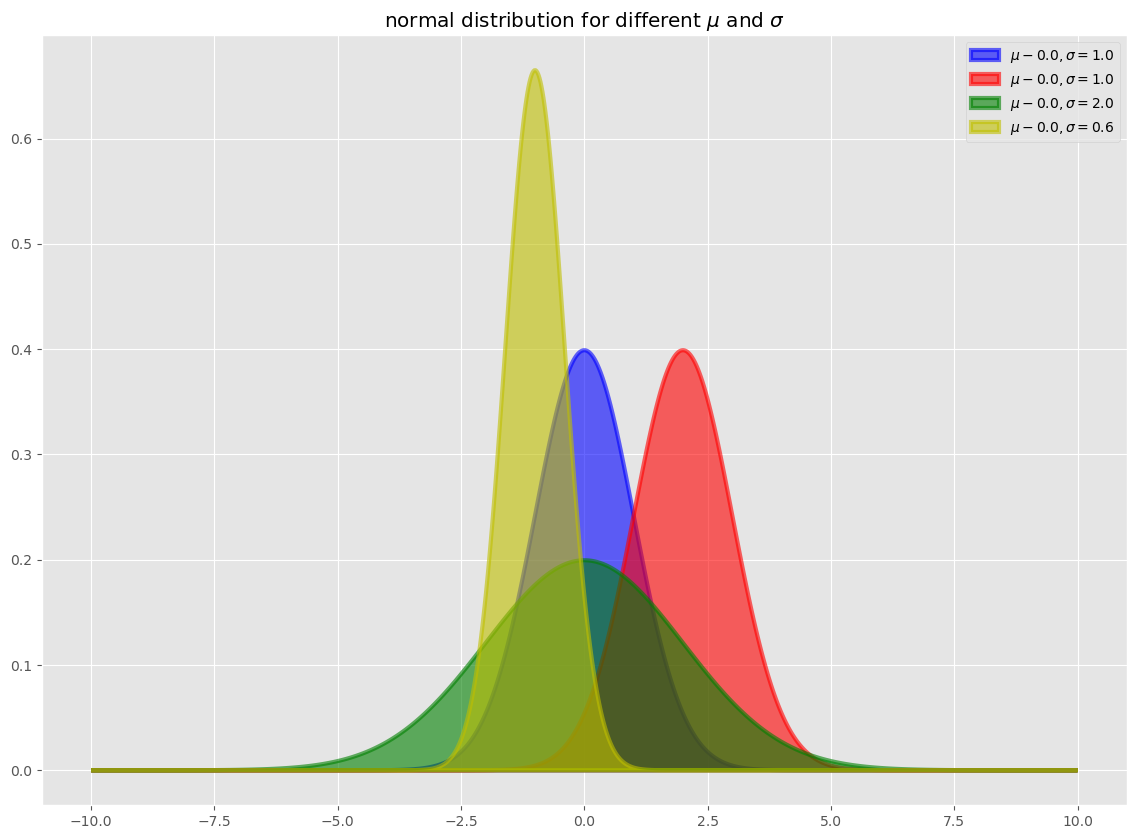

In [13]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc = 0.0, scale = 1.0), label="$\mu - 0.0, \sigma = 1.0$", c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc = 2.0, scale = 1.0), label="$\mu - 0.0, \sigma = 1.0$", c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc = 0.0, scale = 2.0), label="$\mu - 0.0, \sigma = 2.0$", c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc = -1.0, scale = 0.6), label="$\mu - 0.0, \sigma = 0.6$", c='y', alpha=0.6, lw=3.0)

plt.title("normal distribution for different $\mu$ and $\sigma$")
plt.legend()

# Probability

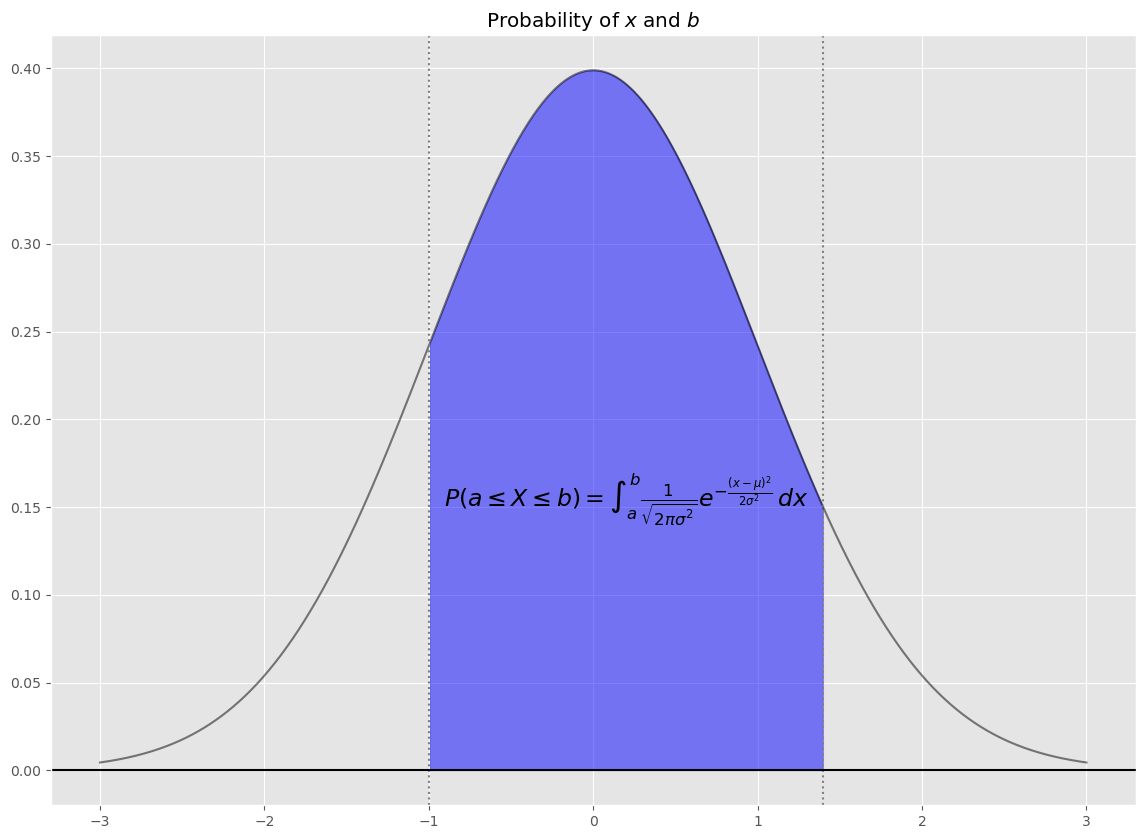

In [15]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc = 0.0, scale = 1.0)

xseg = x[np.logical_and(-1.0 <x, x < 1.4)]
yseg = y[np.logical_and(-1.0 <x, x < 1.4)]

plt.plot(x, y, color = 'k', alpha = 0.5)
plt.fill_between(xseg, yseg, color = 'b', alpha = 0.5)
plt.axvline(x = -1.0, color = 'grey', linestyle = ':')
plt.axvline(x = 1.4, color = 'grey', linestyle = ':')

plt.text(0.2, 0.15, r"$P (a \leq X \leq b) = \int_a^b \frac {1} {\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$", ha ='center', fontsize=17)

plt.axhline(y = 0.0, color = 'black', linestyle = '-')

plt.title("Probability of $x$ and $b$");

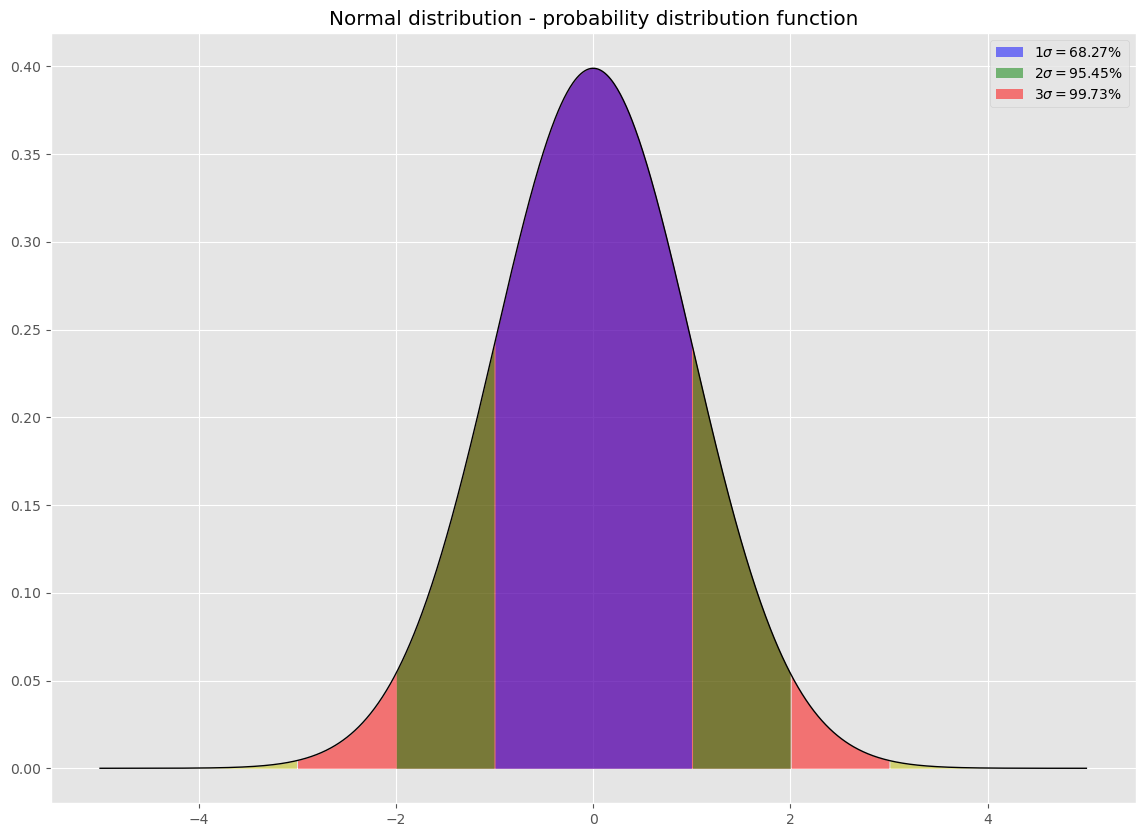

In [21]:
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, ss.norm.pdf(x, loc = 0.0, scale = 1.0), 'k-', linewidth=1.0)

xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'y', alpha = 0.5, linewidth=0)

xseg = x[np.logical_and(-3.0 <= x, x <= 2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'r', alpha = 0.5, linewidth=0)

xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'g', alpha = 0.5, linewidth=0)

xseg = x[np.logical_and(-1.0 <= x, x <= 1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'b', alpha = 0.5, linewidth=0, label ="$1 \sigma = 68.27\%$")

xseg = x[np.logical_and(1.0 <= x, x <= 2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'g', alpha = 0.5, linewidth=0, label ="$2 \sigma = 95.45\%$")

xseg = x[np.logical_and(2.0 <= x, x <= 3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'r', alpha = 0.5, linewidth=0, label ="$3 \sigma = 99.73\%$")

xseg = x[np.logical_and(3.0 <=x, x <= 5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color = 'y', alpha = 0.5, linewidth=0)


plt.title("Normal distribution - probability distribution function")
plt.legend();

https://news.mit.edu/2012/explained-sigma-0209

In most cases, a five-sigma result is considered the gold standard for significance, corresponding to about a one-in-a-million chance that the findings are just a result of random variations; six sigma translates to one chance in a half-billion that the result is a random fluke.

# Sampling distribution

In [23]:
np.set_printoptions(formatter={'float': lambda x: "{0:6.3f}".format(x)})

sampsize = 10
nosamps = 1000

samp = np.random.standard_normal((nosamps, sampsize))
print(samp)

[[ 0.272  0.650  1.104 ...  0.868  2.170  1.517]
 [ 0.452 -0.076 -1.386 ... -1.219 -0.993  0.053]
 [-0.020  0.107 -0.337 ...  0.290 -1.945 -0.276]
 ...
 [-0.755  0.499 -0.268 ...  0.412 -1.090 -0.198]
 [ 0.071  2.806  0.042 ... -1.010 -0.155  1.328]
 [ 0.299 -1.904 -0.994 ...  0.352  1.076 -1.020]]


In [24]:
mean = samp.sum(axis=1) / sampsize
print(mean)

[ 0.620 -0.307 -0.325  0.298 -0.139  0.325 -0.336 -0.394  0.489 -0.155
  0.028  0.068 -0.144 -0.318  0.327 -0.093  0.107  0.058 -0.309  0.128
  0.213 -0.305 -0.400 -0.348  0.490 -0.071  0.404 -0.433 -0.118  0.077
  0.028 -0.315  0.306 -0.736  0.269  0.136  0.097 -0.044  0.216  0.345
 -0.027  0.140 -0.227 -0.332  0.201 -0.042 -0.013 -0.406 -0.373  0.373
 -0.238  0.021  0.207 -0.591  0.289  0.407 -0.113 -0.236 -0.555  0.083
  0.206  0.062 -0.403  0.432 -0.004 -0.070 -0.496  0.463 -0.035  0.206
 -0.541 -0.585  0.552  0.167 -0.274 -0.077 -0.005  0.137 -0.471  0.554
 -0.205  0.496  0.274  0.515 -0.089 -0.252  0.309  0.055 -0.157 -0.181
  0.012 -0.108 -0.414  0.541  0.034 -0.578  0.361 -0.268  0.495  0.132
  0.084 -0.004  0.044  0.246 -0.638 -0.494 -0.650 -0.042  0.125 -0.215
 -0.692 -0.377  0.445  0.258 -0.490  0.150  0.155 -0.662  0.625  0.183
 -0.147 -0.103 -0.039 -0.889  0.290 -0.184 -0.137 -0.354 -0.351  0.531
 -0.521  0.438  0.383 -0.533 -0.051  0.367 -0.711 -0.231  0.129  0.089
  0.18

In [27]:
# calculate the variance

vari = (samp - mean[:, np.newaxis])**2
vari = vari.sum(axis=1) / (sampsize)
stddev = np.sqrt(vari)

mean_stddev = stddev.sum() / nosamps
print(mean_stddev)
print(mean_stddev * (sampsize / (sampsize - 1.0))) # Bessel's correction

0.9298766153327213
1.0331962392585792


In [28]:
import seaborn as sns

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


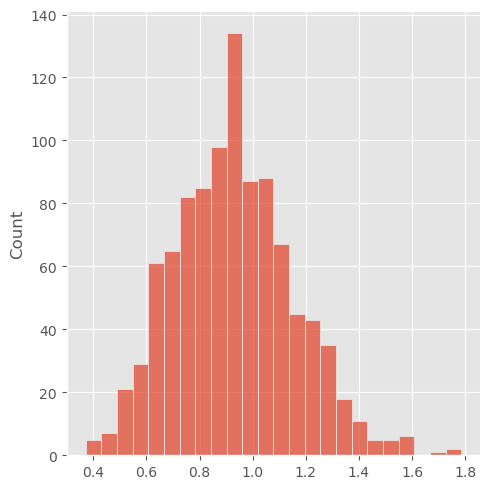

In [30]:
sns.displot(stddev);

https://www.youtube.com/watch?v=bHVPpomkUYs

https://www.youtube.com/watch?v=KkaU2ur3Ymw

if u use the wrong one, it will be underestimated (bias) - graph above, the peak is less than 1 when it should be 1.

so dont divide with n. DIVIDE WITH n-1 (the value will be larger)

for a population, we are calculating a parameter. For a sample, we are calculating a statistic